Binary Classification on UCI Mushroom Dataset
Edible or Poisonous?

In [43]:
import numpy as np

import datetime
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [44]:
def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['acc'])
   plt.plot(h.history['val_acc'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

Read Dataset

In [45]:
df = pd.read_csv('mushrooms.csv')
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


Neural Networks don't understand letters. We need to encode them

In [46]:
# Quick way to encode whole dataframe
df_enc = df.apply(LabelEncoder().fit_transform)
# everything is encoded now
data = df_enc.values  # data is an array. Keras likes arrays
headers = list(df.columns.values) #store features of mushrooms
print(data.shape, type(data))
print(data)

(8124, 23) <class 'numpy.ndarray'>
[[1 5 2 ... 2 3 5]
 [0 5 2 ... 3 2 1]
 [0 0 2 ... 3 2 3]
 ...
 [0 2 2 ... 0 1 2]
 [1 3 3 ... 7 4 2]
 [0 5 2 ... 4 1 2]]


Split and prepare y (objective) is in column 1

In [47]:
split = int(0.90 * data.shape[0])

x_train = data[:split , 1:]
y_train = data[:split, 0]

x_test = data[split: , 1:]
y_test = data[split: , 0]

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(7311, 22) (7311,)
(813, 22) (813,)


Let's define the network

In [52]:
model = Sequential()
model.add(Dense(11, input_shape=(22,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam_defined = Adam(lr=0.0005)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=adam_defined, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 11)                253       
_________________________________________________________________
dense_54 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 9         
Total params: 1,550
Trainable params: 1,550
Non-trainable params: 0
_________________________________________________________________


train

In [53]:
hist = model.fit(x_train, y_train, epochs=15, shuffle=True,batch_size=10,validation_data=(x_test, y_test))

Train on 7311 samples, validate on 813 samples
Epoch 1/15
7311/7311 [==============================] - 15s 2ms/step - loss: 0.4246 - acc: 0.8147 - val_loss: 0.1957 - val_acc: 0.9631
Epoch 2/15
7311/7311 [==============================] - 12s 2ms/step - loss: 0.2356 - acc: 0.9066 - val_loss: 0.2084 - val_acc: 0.9557
Epoch 3/15
7311/7311 [==============================] - 12s 2ms/step - loss: 0.1332 - acc: 0.9476 - val_loss: 0.2423 - val_acc: 0.9410
Epoch 4/15
7311/7311 [==============================] - 12s 2ms/step - loss: 0.0852 - acc: 0.9692 - val_loss: 0.2138 - val_acc: 0.9041
Epoch 5/15
7311/7311 [==============================] - 12s 2ms/step - loss: 0.0572 - acc: 0.9809 - val_loss: 0.2800 - val_acc: 0.8622
Epoch 6/15
7311/7311 [==============================] - 12s 2ms/step - loss: 0.0403 - acc: 0.9869 - val_loss: 0.0546 - val_acc: 0.9914
Epoch 7/15
7311/7311 [==============================] - 13s 2ms/step - loss: 0.0262 - acc: 0.9923 - val_loss: 0.0775 - val_acc: 0.9606
Epoch 8/

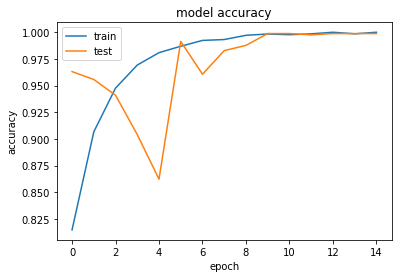

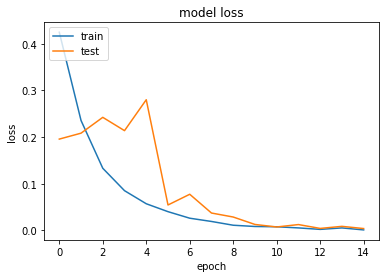

In [54]:
Analyze_training(hist)